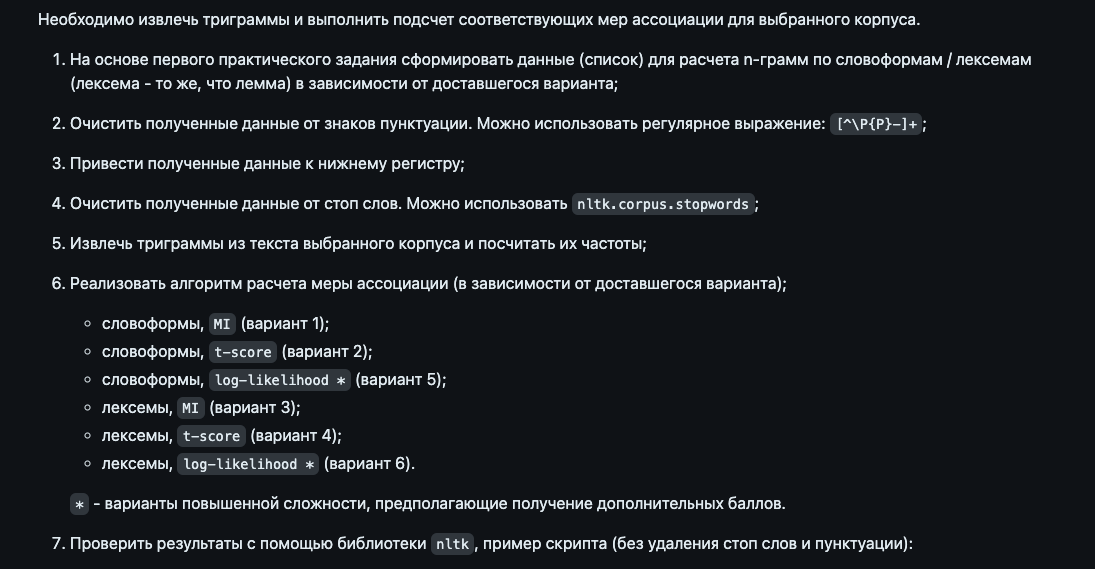

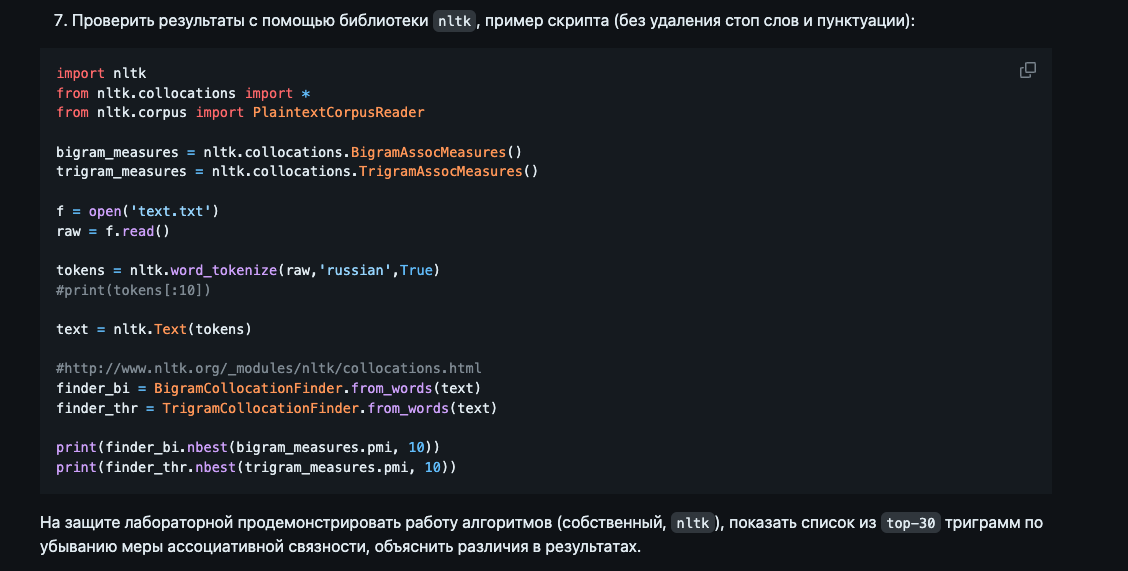

In [ ]:
import pandas as pd
import regex as re
import nltk
from nltk.corpus import stopwords
from collections import Counter
from collections import defaultdict
import math

In [ ]:
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

In [ ]:
def read_tsv_file(path_file):
   sentences = list()
   sentence = list()
   with open(path_file) as file:
     for line in file:
         if line != "\n":
            lemma = line.split('\t')[2]
            sentence.append(lemma[:-1]) #remove \n
         if line == "\n" and sentence:
           sentences.append(sentence)
           sentence = list()
   return sentences


def remove_punct_marks(data):
   clear_data = list()
   for sentence in data:
      sentence_data = [re.sub(r"[^\P{P}-]+","", lemma.lower()) for lemma in sentence if re.sub(r"[^\P{P}-]+","", lemma.lower()) and lemma.lower() not in stop_words]
      clear_data.append(sentence_data)
   return clear_data


def extract_trigrams(clear_data):
    trigrams = list()
    for sentence in clear_data:
        for i in range(len(sentence) - 2):
            trigrams.append(sentence[i:i+3])
    return trigrams


def count_words(clear_data):
    f_words = dict()
    for sentence in clear_data:
        for word in sentence:  
            if word not in f_words:
                f_words[word] = 1
            else:
                f_words[word] += 1
    return f_words


def t_score(trigram_frequencies, word_counts, total_words):
    t_scores = {}
    for trigram, count in trigram_frequencies.items():
        expected_frequency = (word_counts[trigram[0]] / total_words) * \
                            (word_counts[trigram[1]] / total_words) * \
                            (word_counts[trigram[2]] / total_words) * total_words
        t_score = (count - expected_frequency) / math.sqrt(count)
        t_scores[trigram] = t_score
    return t_scores


def trigram_frequencies(trigrams_data):
    trigram_frequencie = dict()
    for trigram in trigrams_data:
        if tuple(trigram) not in trigram_frequencie:
            trigram_frequencie[tuple(trigram)] = 1
        else:
            trigram_frequencie[tuple(trigram)] += 1
    return trigram_frequencie




data = read_tsv_file('/media/space/ssd_1_tb_evo_sumsung/MishaHW/train/alt.atheism/49960.tsv')
clear_data = remove_punct_marks(data)

trigrams_data = extract_trigrams(clear_data)
word_counts = count_words(clear_data)

trigram_frequencie = trigram_frequencies(trigrams_data)
total_words = sum(word_counts.values())

t_scores = t_score(trigram_frequencie, word_counts, total_words)

sorted_t_scores = sorted(t_scores.items(), key=lambda x: x[1], reverse=True)[:30]

# Вывод отсортированного словаря
for trigram, score in sorted_t_scores:
    print(f"{trigram}: {score}")

In [ ]:
import nltk
from nltk.collocations import *
from nltk.corpus import PlaintextCorpusReader

bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

f = open('20news-bydate-train/alt.atheism/49960')
raw = f.read()

tokens = nltk.word_tokenize(raw,'english',True)
print(tokens[:10])

# text = nltk.Text(tokens)

# finder_thr = TrigramCollocationFinder.from_words(text)

# print(finder_thr.nbest(trigram_measures.pmi, 30))

In [ ]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()

flat_list = [item for sublist in clear_data for item in sublist]
finder_thr = TrigramCollocationFinder.from_words(flat_list) 

In [ ]:

print(finder_thr.nbest(trigram_measures.student_t, 30))